## KNN e Árvore de Regressão

O objetivo deste exercício é se aprofundar nos conceitos de regressão e implementar os algoritmos de K-vizinhos mais próximos (KNN) e Árvore de Regressão.

Utilizaremos as mesmas bases de dados do exercício anterior:

In [1]:
import pandas as pd

dados_adv = pd.read_csv('data/Advertising.csv', index_col=0)

dados_por = pd.read_csv('data/Portland_housePrices.csv', index_col=None)

X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

O algoritmo KNN é implementado pela classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html">KNeighborsRegressor</a>:

In [2]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2,weights='uniform')
neigh.fit(X,y)

KNeighborsRegressor(n_neighbors=2)

Aqui, o algoritmo é configurado com K = 2 e o peso de cada instância é definido uniformemente.

O "formato" do modelo aprendido pelo KNN é bem diferente do aprendido pela regressão linear:

Text(0, 0.5, 'Preço')

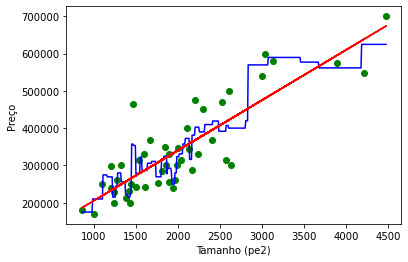

In [3]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import numpy as np


linear = LinearRegression().fit(X,y)

T = np.linspace(min(X.values.ravel()),max(X.values.ravel()), 500 )[:, np.newaxis]
y_ = neigh.predict(T)


plt.scatter(X, y,color='g')
plt.plot(T, y_,color='b')
plt.plot(X, linear.predict(X),color='r')

plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

A parametrização K e o peso das instâncias podem ser alteradas no momento da instanciação do objeto, por exemplo:
    
```python
    neigh = KNeighborsRegressor(n_neighbors=3,weights='uniform') # K = 3, peso uniforme
    neigh = KNeighborsRegressor(n_neighbors=2,weights='distance') # K = 2, peso baseado na distância
```    

## Exercício 1

Para as duas bases de treinamento de regressão (<i>Advertising</i> e <i>Portland_housePrices</i>), avalie quais são as melhores parametrizações (use inspeção visual e RSS/R^2).
    
    

In [4]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import time

split = 0.3

div1 = int(split * len(X))
xtrain = X[:div1]
xtest = X[div1:]

div2 = int(split * len(y))
ytrain = y[:div2]
ytest = y[div2:]


# reg = LinearRegression().fit(xtrain,ytrain)
# reg

def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())
    
def calc_r2(y,predicted):
    return r2_score(predicted,y)

def calc_mse(y, predicted):
    return mean_squared_error(predicted, y, squared=False)

In [5]:
neigh = KNeighborsRegressor(n_neighbors=3,weights='uniform')
neigh.fit(xtrain,ytrain)

rssr = calc_rss(ytest, neigh.predict(xtest))
r2r = calc_r2(ytest, neigh.predict(xtest))
mser = calc_mse(ytest, neigh.predict(xtest))

print("peso uniforme:")
print(rssr)
print(r2r)
print(mser)

peso uniforme:
208285481407.55554
0.33202151477095565
79446.09024221651


In [6]:
neigh = KNeighborsRegressor(n_neighbors=2,weights='distance')
neigh.fit(xtrain,ytrain)

rssr = calc_rss(ytest, neigh.predict(xtest))
r2r = calc_r2(ytest, neigh.predict(xtest))
mser = calc_mse(ytest, neigh.predict(xtest))

print("peso baseado na distância:")
print(rssr)
print(r2r)
print(mser)

peso baseado na distância:
203196171898.95093
0.5670064756782321
78469.48295046721


In [7]:
dados_adv = pd.read_csv('data/Advertising.csv', index_col=0)
dados_adv = dados_adv.sample(frac=1)

#TV, radio,newspaper, sales
X2 = dados_adv.loc[:,['TV', 'radio', 'newspaper']]
y2 = dados_adv.loc[:,['sales']]

In [8]:
div1 = int(split * len(X2))
xtrain = X2[:div1]
xtest = X2[div1:]

div2 = int(split * len(y2))
ytrain = y2[:div2]
ytest = y2[div2:]


In [9]:
neigh = KNeighborsRegressor(n_neighbors=3,weights='uniform')
neigh.fit(xtrain,ytrain)

rssr = calc_rss(ytest, neigh.predict(xtest))
r2r = calc_r2(ytest, neigh.predict(xtest))
mser = calc_mse(ytest, neigh.predict(xtest))

print("peso uniforme:")
print(rssr)
print(r2r)
print(mser)

peso uniforme:
618.2733333333333
0.8000102784822531
2.1014847359041404


In [10]:
neigh = KNeighborsRegressor(n_neighbors=2,weights='distance')
neigh.fit(xtrain,ytrain)

rssr = calc_rss(ytest, neigh.predict(xtest))
r2r = calc_r2(ytest, neigh.predict(xtest))
mser = calc_mse(ytest, neigh.predict(xtest))

print("peso baseado na distância:")
print(rssr)
print(r2r)
print(mser)

peso baseado na distância:
597.7489706675159
0.8050461821899121
2.0663096342920078


R: Para ambos os datasets, a parametrização por distância gerou resultados melhores.


## Árvore de Regressão

A árvore de decisão é implementada através da classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html">DecisionTreeRegressor</a>.


In [11]:
from sklearn.tree import DecisionTreeRegressor  
#Regression tree
# create a regressor object 
tree = DecisionTreeRegressor()  
  
# fit the regressor with X and Y data 
tree.fit(X, y) 

DecisionTreeRegressor()

Text(0, 0.5, 'Preço')

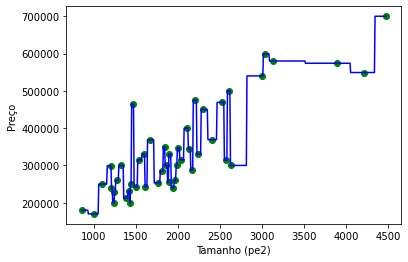

In [15]:
plt.scatter(X, y,color='g')
y_t = tree.predict(T)
plt.plot(T, y_t,color='b')

plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

É possível também gerar a árvore resultante para visualização:

In [12]:
from sklearn.tree import export_graphviz  
 

export_graphviz(tree, out_file ='tree.dot', 
               feature_names =['Tamanho'])

Este código irá gerar um arquivo <b>tree.dot</b>.

Esse arquivo pode ser visualizado no site <a href='http://www.webgraphviz.com/'>http://www.webgraphviz.com</a>

## Exercício 2

Qual seria o melhor método para montar um modelo em cada uma das bases com Árvore de Decisão?

Utilizar apenas um atributo? multiplos? quais seriam?

In [13]:
X = dados_por.loc[:,['tamanho', 'quartos']]
y = dados_por.loc[:,['preco']]

div1 = int(split * len(X))
xtrain = X[:div1]
xtest = X[div1:]

div2 = int(split * len(y))
ytrain = y[:div2]
ytest = y[div2:]

tree2 = DecisionTreeRegressor()

tree2.fit(xtest, ytest) 
#rssr = calc_rss(ytest, tree2.predict(xtest))
r2r = calc_r2(ytest, tree2.predict(xtest))
mser = calc_mse(ytest, tree2.predict(xtest))

print(r2r)
print(mser)

1.0
0.0


In [14]:
X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

div1 = int(split * len(X))
xtrain = X[:div1]
xtest = X[div1:]

div2 = int(split * len(y))
ytrain = y[:div2]
ytest = y[div2:]

tree2 = DecisionTreeRegressor()

tree2.fit(xtest, ytest) 
#rssr = calc_rss(ytest, tree2.predict(xtest))
r2r = calc_r2(ytest, tree2.predict(xtest))
mser = calc_mse(ytest, tree2.predict(xtest))

print(r2r)
print(mser)

1.0
0.0


In [15]:
X = dados_por.loc[:,['quartos']]
y = dados_por.loc[:,['preco']]

div1 = int(split * len(X))
xtrain = X[:div1]
xtest = X[div1:]

div2 = int(split * len(y))
ytrain = y[:div2]
ytest = y[div2:]

tree2 = DecisionTreeRegressor()

tree2.fit(xtest, ytest) 
#rssr = calc_rss(ytest, tree2.predict(xtest))
r2r = calc_r2(ytest, tree2.predict(xtest))
mser = calc_mse(ytest, tree2.predict(xtest))

print(r2r)
print(mser)

-5.824825931798749
112088.75705330494


In [17]:
X2 = dados_adv.loc[:,['TV', 'radio', 'newspaper']]
y2 = dados_adv.loc[:,['sales']]

div1 = int(split * len(X2))
xtrain = X2[:div1]
xtest = X2[div1:]

div2 = int(split * len(y2))
ytrain = y2[:div2]
ytest = y2[div2:]

tree2 = DecisionTreeRegressor()

tree2.fit(xtest, ytest) 
#rssr = calc_rss(ytest, tree2.predict(xtest))
r2r = calc_r2(ytest, tree2.predict(xtest))
mser = calc_mse(ytest, tree2.predict(xtest))

print(r2r)
print(mser)

1.0
0.0


In [18]:
X2 = dados_adv.loc[:,['TV']]
y2 = dados_adv.loc[:,['sales']]

div1 = int(split * len(X2))
xtrain = X2[:div1]
xtest = X2[div1:]

div2 = int(split * len(y2))
ytrain = y2[:div2]
ytest = y2[div2:]

tree2 = DecisionTreeRegressor()

tree2.fit(xtest, ytest) 
#rssr = calc_rss(ytest, tree2.predict(xtest))
r2r = calc_r2(ytest, tree2.predict(xtest))
mser = calc_mse(ytest, tree2.predict(xtest))

print(r2r)
print(mser)

0.9829986587571461
0.6650187967268293


In [19]:
X2 = dados_adv.loc[:,['radio']]
y2 = dados_adv.loc[:,['sales']]

div1 = int(split * len(X2))
xtrain = X2[:div1]
xtest = X2[div1:]

div2 = int(split * len(y2))
ytrain = y2[:div2]
ytest = y2[div2:]

tree2 = DecisionTreeRegressor()

tree2.fit(xtest, ytest) 
#rssr = calc_rss(ytest, tree2.predict(xtest))
r2r = calc_r2(ytest, tree2.predict(xtest))
mser = calc_mse(ytest, tree2.predict(xtest))

print(r2r)
print(mser)

0.9494309385022328
1.1284523746728357


In [20]:
X2 = dados_adv.loc[:,['newspaper']]
y2 = dados_adv.loc[:,['sales']]

div1 = int(split * len(X2))
xtrain = X2[:div1]
xtest = X2[div1:]

div2 = int(split * len(y2))
ytrain = y2[:div2]
ytest = y2[div2:]

tree2 = DecisionTreeRegressor()

tree2.fit(xtest, ytest) 
#rssr = calc_rss(ytest, tree2.predict(xtest))
r2r = calc_r2(ytest, tree2.predict(xtest))
mser = calc_mse(ytest, tree2.predict(xtest))

print(r2r)
print(mser)

0.9183558200901748
1.4131019577005557


**R**: No dataset de preços de casas o tamanho conseguiu apresentar os melhores resultados.

**R**: No dataset de anúncios a TV apresentou o melhor resultado entre os 3, porém ao utilizar o dataset inteiro, foi encontrado o melhore resultado.

## Comparação entre modelos

Agora já sabemos como implementar um modelo linear multivariado:

```python
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X,y)
```

como implementar o regressor KNN:

```python
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor().fit(X,y)
```

e como implementar uma árvore de regressão:

```python
from sklearn.tree import DecisionTreeRegressor  
tree = DecisionTreeRegressor().fit(X,y)
```

Conhecemos todos os algoritmos e seus parâmetros, agora como decidir <b>qual</b> deles usar efetivamente? Olhar o <i>fitting</i> em sua base de dados e tomar isso como verdade absoluta pode ser completamente enganoso.

Podemos tentar <i>aliviar</i> esse problema fazendo uma comparação mais inteligente

## Exercício 3

1) Separe as bases <i>Portland_housePrices</i> e <i>Advertising</i> em conjuntos de <i>treinamento</i> e <i>teste</i> (30% das instâncias para teste e 70% para treinamento).

2) Utilize as bases de treinamento para treinar os modelos a serem avaliados, e as bases de teste para avaliar o desempenho regressor dos modelos.

3) Qual é o melhor modelo para cada problema? Por que você fez essa recomendação? (mostre métricas, gráficos, ou as evidências que julgar necessárias).

**1**: Feito anteriormente.

**2**: Feito anteriormente.

**3**: A árvore de decisão apresentou melhores resultados levando em consideração as medidas de r2 e mse.